In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from skimage import measure
from skimage.measure import regionprops
from skimage.morphology import opening, disk

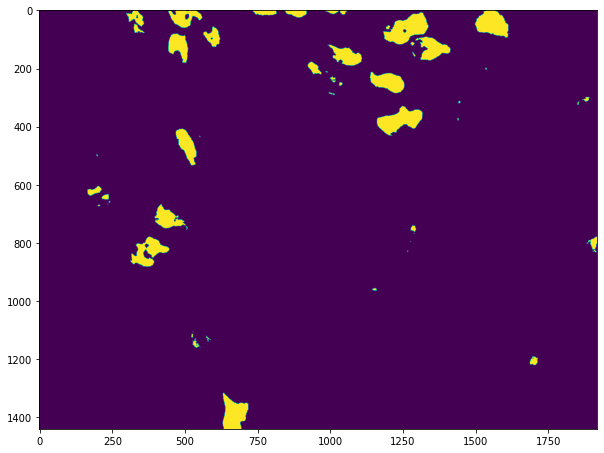

In [54]:
PATH = "/content/drive/My Drive/Breast Cancer Treatment/Numpy Arrays/Predicted Output/Negative/Train/ER Patient 1.npy"
img = np.load(PATH)
img = img[1]
plt.figure(figsize = (10, 10))
plt.subplot().imshow(img)

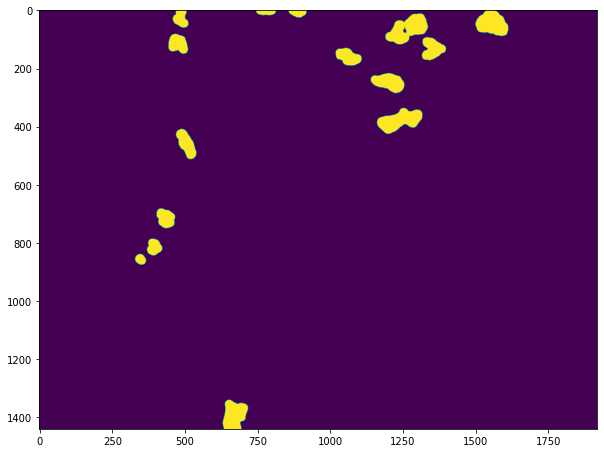

In [55]:
# Opening operation to remove very small patches and to split overlapping nuclei
selem = disk(15)
opened = opening(img, selem)
plt.figure(figsize = (10, 10))
plt.subplot().imshow(opened)

In [56]:
# Finding the regions/nuclei
nuclei = measure.label(opened)
props = regionprops(nuclei)
print(len(props))

15


In [57]:
# Removing very small patches produced due to staining
new_props = list.copy(props)
for i in range(len(props)):
  if props[i].area <= 200:
    new_props.pop(i)
props = new_props
print(len(props))

15


In [58]:
# Finding average nuclei size
avg_size = 0
for i in range(len(props)):
  avg_size += props[i].area 
avg_size /= len(props)
print(avg_size)

4244.8


In [59]:
# Splitting overlapping nuclei and counting
count = len(props)
for i in range(len(props)):
  if(props[i].area > avg_size):
    count += math.floor(props[i].area/avg_size - 1)  
print(count)

16


In [0]:
#counting strong and intermediate nuclei

intermediate = measure.label(final[:,:,1])
strong = measure.label(final[:,:,2])
iprops = regionprops(intermediate)
sprops = regionprops(strong)

In [0]:
# import math

# def count(props,thresh):
#   count = 0
#   for i in range(len(props)):
#     if props[i].area >= thresh:
#       count += 1
#   return count

In [0]:
print(strong.max())
print(intermediate.max())

54
51


In [0]:
s_input = cv2.imread('/content/drive/My Drive/Breast Cancer Treatment/_ER/Strong/IHC 239/_9790.png')
i_input = cv2.imread('/content/drive/My Drive/Breast Cancer Treatment/_ER/Intermediate/IHC 239/_9790.png')

In [0]:
iMask  = cv2.cvtColor(i_input, cv2.COLOR_BGR2GRAY)
ret, iMask = cv2.threshold(iMask, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
sMask  = cv2.cvtColor(s_input, cv2.COLOR_BGR2GRAY)
ret, sMask = cv2.threshold(sMask, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [0]:
print(measure.label(sMask).max())
print(measure.label(iMask).max())

60
39


In [0]:
sum = 0
for i in range(len(props)):
  if props[i].area >= 200:
    sum += props[i].area
mean_area = sum/len(props)

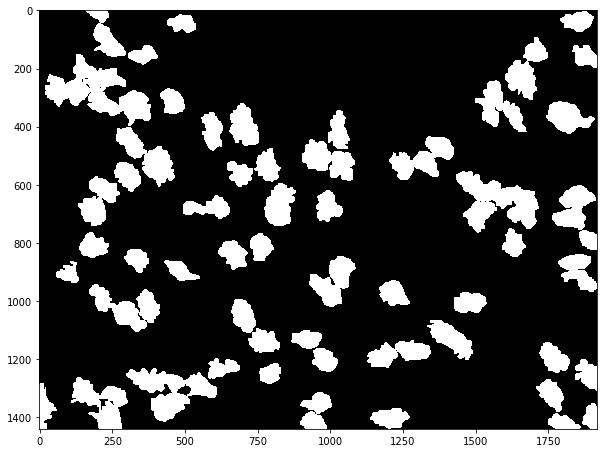

In [0]:
plt.figure(figsize = (10, 10))
plt.subplot().imshow(sMask, 'gray')